<a href="https://quera.org/course/assignments/71712/problems"><h1>دوچرخه سواری در مونتریال</h1></a>

<h2>Mersad Mostofian | 401243124</h2>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('comptagesvelo2015.csv')
df

,Date,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
0,01/01/2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,02/01/2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,03/01/2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,04/01/2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,05/01/2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,11/11/2015,00:00,3044,1931,2828,1393,NaN,3603,1754,1142,...,950.0,2328,3280,1210,338,4065.0,1534,1527,2860,356
315,12/11/2015,00:00,1751,930,1670,888,NaN,2048,700,675,...,467.0,1345,1877,755,180,2336.0,960,955,1777,198
316,13/11/2015,00:00,1818,906,1711,873,NaN,2115,634,477,...,482.0,1416,1980,719,204,2628.0,978,1040,1727,258
317,14/11/2015,00:00,979,759,978,322,NaN,1112,290,310,...,266.0,1061,1448,269,70,1876.0,640,805,737,73


<h4>داده‌ها از فایل CSV به نام comptagesvelo2015.csv بارگذاری شدند. داده‌ها شامل تعداد دوچرخه‌سواران در مسیرهای مختلف در طول زمان است. در ابتدا، داده‌ها بررسی و میانگین تعداد دوچرخه‌ها برای هر مسیر محاسبه شد تا مسیرهای پرطرفدار شناسایی شوند.</h4>

<Axes: >

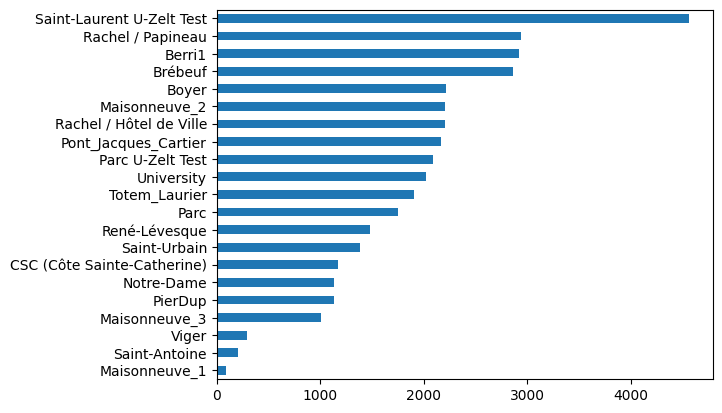

In [46]:
df.loc[:,'Berri1':'Viger'].mean().sort_values().plot(kind='barh')

<h4>سه مسیر با بیشترین میانگین تعداد دوچرخه انتخاب شدند (به استثنای ستون 'Saint-Laurent U-Zelt Test').</h4>

In [47]:
streets = df.loc[:,'Berri1':'Viger']
streets.drop('Saint-Laurent U-Zelt Test',axis=1,inplace=True)
streets.mean().nlargest(3)

Rachel / Papineau    2939.294671
Berri1               2915.398119
Brébeuf              2859.485893
dtype: float64

<h3>توابع مورد نیاز 
polynomial regression</h3>

In [48]:
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [49]:
def update(x,t,w,b,alpha):
    n = float(len(x))
    y = np.dot(x.T,w) + b
    err = y-t
    w_new = (1/n) * np.dot(x,err)
    b_new = (1/n) * np.sum(err)
    w -= alpha * w_new
    b -= alpha * b_new
    return w,b

In [50]:
def poly(x,degree):
    x = x.flatten()
    poly_x = np.empty((degree,len(x)))
    for i in range(degree):
        poly_x[i] = x ** (i+1)
    return poly_x

In [51]:
def cal_err(x,t,w,b):
    n = float(len(x))
    y = np.dot(x.T,w) + b
    err = y-t
    return ((1/n) * np.sum(np.abs(err)),(1/(2*n)) * np.sum(np.square(err)))

In [52]:
def poly_reg(x,t,w,b,alpha,epoch):
    for i in range(epoch):
        w,b = update(x,t,w,b,alpha)
        if i % 100_000 == 0:
            L1,L2 = cal_err(x,t,w,b)
            print(f'epoch: {i}, L1 : {L1}  / L2 : {L2}')
    return w,b,L1,L2

In [53]:
def call_poly_reg(df,col,degree):
    x = normalize(np.arange(1,len(df['Date'])+1))   
    y = normalize(df[col].to_numpy())

    b = 0
    x_poly = poly(x,degree)
    w = np.random.randn(degree)
    alpha = 0.001
    epoch = 1_000_000
    w,b,L1,L2 = poly_reg(x_poly,y,w,b,alpha,epoch)
    return w,b,L1,L2,x_poly,x,y
    


<h3>Rachel / Papineau</h3>

epoch: 0, L1 : 11.981634218454172  / L2 : 3.100562317608675
epoch: 100000, L1 : 5.039186101227732  / L2 : 0.4323691944652499
epoch: 200000, L1 : 4.92946860499796  / L2 : 0.421161597321972
epoch: 300000, L1 : 4.848103760078884  / L2 : 0.4142701537655199
epoch: 400000, L1 : 4.78559378698164  / L2 : 0.409980497655255
epoch: 500000, L1 : 4.738146321867049  / L2 : 0.40725987669628994
epoch: 600000, L1 : 4.702293758149122  / L2 : 0.40548611963151765
epoch: 700000, L1 : 4.674865324877769  / L2 : 0.40428439788438675
epoch: 800000, L1 : 4.6530882371001345  / L2 : 0.4034288874216352
epoch: 900000, L1 : 4.635507735586488  / L2 : 0.40278352783960325


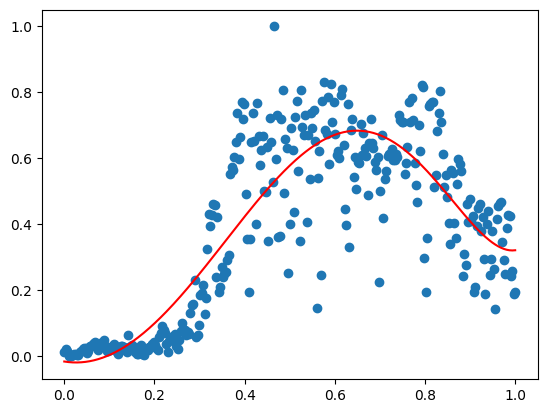

In [54]:
w1,b1,_,_,x_poly1,x1,y1 = call_poly_reg(df,'Rachel / Papineau',7)
plt.scatter(x1,y1)
y_p = np.dot(x_poly1.T,w1) + b1
plt.plot(x1,y_p,'r')
plt.show()

<h3>Berri1</h3>

epoch: 0, L1 : 8.010397831079395  / L2 : 1.0218464175606201
epoch: 100000, L1 : 6.451504758168181  / L2 : 0.7112280665485174
epoch: 200000, L1 : 6.327612327378763  / L2 : 0.6988295506124355
epoch: 300000, L1 : 6.234221534965785  / L2 : 0.6912008166885157
epoch: 400000, L1 : 6.163000336884461  / L2 : 0.6864474123299252
epoch: 500000, L1 : 6.1100001042499565  / L2 : 0.6834280637341007
epoch: 600000, L1 : 6.068980154116795  / L2 : 0.6814552212478788
epoch: 700000, L1 : 6.036607427203999  / L2 : 0.6801146682279523
epoch: 800000, L1 : 6.010941885864899  / L2 : 0.6791568497152743
epoch: 900000, L1 : 5.991231377692406  / L2 : 0.6784314065963982


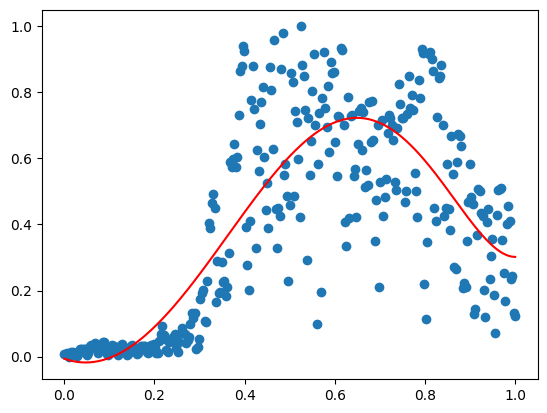

In [55]:
w2,b2,_,_,x_poly2,x2,y2 = call_poly_reg(df,'Berri1',7)
plt.scatter(x2,y2)
y_p = np.dot(x_poly2.T,w2) + b2
plt.plot(x2,y_p,'r')
plt.show()

<h3>Brébeuf</h3>

epoch: 0, L1 : 19.484488760095218  / L2 : 6.613266439863801
epoch: 100000, L1 : 6.280124432060643  / L2 : 0.6556042987013577
epoch: 200000, L1 : 6.108469121239476  / L2 : 0.6351984055700975
epoch: 300000, L1 : 5.986938036367354  / L2 : 0.6227723370267929
epoch: 400000, L1 : 5.898927278645  / L2 : 0.6151549487719438
epoch: 500000, L1 : 5.831666365034105  / L2 : 0.6104359934395355
epoch: 600000, L1 : 5.7809624276524385  / L2 : 0.607464679707049
epoch: 700000, L1 : 5.744468324957564  / L2 : 0.605547728379614
epoch: 800000, L1 : 5.717320520070347  / L2 : 0.6042674751796492
epoch: 900000, L1 : 5.696334905038504  / L2 : 0.6033722921338963


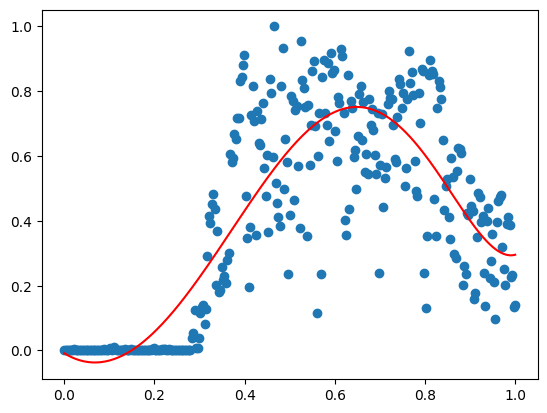

In [56]:
w3,b3,_,_,x_poly3,x3,y3 = call_poly_reg(df,'Brébeuf',7)
plt.scatter(x3,y3)
y_p = np.dot(x_poly3.T,w3) + b3
plt.plot(x3,y_p,'r')
plt.show()

In [57]:
def denormalize(data, original):
    return data * (original.max() - original.min()) + original.min()

<h4>Brébeufچون مسیر به دنبال مسیر خلوت تر در بین این سه مسیر هستیم پس مسیر مورد نظر:</h4>

In [58]:
tomorrow = (np.array([len(df)+1]))
tomorrow = (tomorrow - np.arange(1,len(df['Date'])+1).min()) / (np.arange(1,len(df['Date'])+1).max() - np.arange(1,len(df['Date'])+1).min())
tomorrow_poly = poly(tomorrow,7)
y_pred1 = np.dot(tomorrow_poly.T,w1)+b1
print(f"Rachel / Papineau : {int(denormalize(y_pred1,df['Rachel / Papineau']))}")
y_pred2 = np.dot(tomorrow_poly.T,w2)+b2
print(f"Berri1 : {int(denormalize(y_pred1,df['Berri1']))}")
y_pred3 = np.dot(tomorrow_poly.T,w3)+b3
print(f"Brébeuf : {int(denormalize(y_pred1,df['Brébeuf']))}")

Rachel / Papineau : 2481
Berri1 : 2385
Brébeuf : 2357


C:\Users\Mersad\AppData\Local\Temp\ipykernel_4244\4256809383.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Rachel / Papineau : {int(denormalize(y_pred1,df['Rachel / Papineau']))}")
C:\Users\Mersad\AppData\Local\Temp\ipykernel_4244\4256809383.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Berri1 : {int(denormalize(y_pred1,df['Berri1']))}")
C:\Users\Mersad\AppData\Local\Temp\ipykernel_4244\4256809383.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated Num

In [59]:
from sklearn.model_selection import train_test_split

def train_part(col,degree):
    x = normalize(np.arange(1,len(df['Date'])+1))   
    y = normalize(df[col].to_numpy())
    x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=42,shuffle=True,test_size=0.20)
    b = 0
    x_poly = poly(x_train,degree)
    w = np.random.randn(degree)
    alpha = 0.001
    epoch = 1_000_000
    w,b,L1_train,L2_train = poly_reg(x_poly,y_train,w,b,alpha,epoch)
    x_poly_test = poly(x_test, degree)
    L1_test, L2_test = cal_err(x_poly_test, y_test, w, b)
    return w,b,L1_train,L2_train,L1_test,L2_test
    


In [60]:
record = dict()
for i in [3,7,20]:
    record[i] = {}
    for col in ['Rachel / Papineau','Berri1','Brébeuf']:
        w,b,L1_train,L2_train,L1_test,L2_test = train_part(col,i)
        record[i][col] = [L1_train,L2_train,L1_test,L2_test]


epoch: 0, L1 : 73.17537175181933  / L2 : 41.91864674002173
epoch: 100000, L1 : 9.74599406567652  / L2 : 0.8712205838982829
epoch: 200000, L1 : 9.505921021866373  / L2 : 0.8543886691915408
epoch: 300000, L1 : 9.412110161051078  / L2 : 0.851206436028913
epoch: 400000, L1 : 9.379330799374545  / L2 : 0.8506048046591157
epoch: 500000, L1 : 9.365342499163427  / L2 : 0.8504910605408735
epoch: 600000, L1 : 9.359260250352714  / L2 : 0.8504695561362094
epoch: 700000, L1 : 9.356615629488356  / L2 : 0.8504654905244919
epoch: 800000, L1 : 9.35546572264733  / L2 : 0.8504647218820255
epoch: 900000, L1 : 9.354965731982938  / L2 : 0.8504645765628746
epoch: 0, L1 : 37.5368767232207  / L2 : 16.245561258406386
epoch: 100000, L1 : 12.521177984964389  / L2 : 1.3952514675253531
epoch: 200000, L1 : 12.148626011593132  / L2 : 1.3710502742440411
epoch: 300000, L1 : 11.992245250965205  / L2 : 1.3664748090532557
epoch: 400000, L1 : 11.924642252952498  / L2 : 1.3656097739506987
epoch: 500000, L1 : 11.8961158978663

In [61]:
for degree in record:
    print(f'{degree} : ')
    for col in record[degree]:
        L1_train, L2_train, L1_test, L2_test = record[degree][col]
        print(f"{col} : L1_train : {L1_train} / L2_train : {L2_train}\nL1_test : {L1_test} / L2_test : {L2_test}")

3 : 
Rachel / Papineau : L1_train : 9.354965731982938 / L2_train : 0.8504645765628746
L1_test : 2.057694568601722 / L2_test : 0.15935529369058188
Berri1 : L1_train : 11.874954545824444 / L2_train : 1.3654081517752226
L1_test : 2.727987189543268 / L2_test : 0.31031506417024846
Brébeuf : L1_train : 11.503329740497819 / L2_train : 1.2551035066121028
L1_test : 2.6710493076165727 / L2_test : 0.2805573910608787
7 : 
Rachel / Papineau : L1_train : 3.8626273850311157 / L2_train : 0.34765113848985774
L1_test : 0.817172468967841 / L2_test : 0.05900228009183596
Berri1 : L1_train : 4.994373750219675 / L2_train : 0.569092577594753
L1_test : 1.0553211193979608 / L2_test : 0.11943327412446134
Brébeuf : L1_train : 4.7678421974654634 / L2_train : 0.5091540665843155
L1_test : 1.0293243691982026 / L2_test : 0.10399380123500505
20 : 
Rachel / Papineau : L1_train : 1.396967396488872 / L2_train : 0.12669677531791423
L1_test : 0.30314602524542694 / L2_test : 0.022531490822337213
Berri1 : L1_train : 1.8095280

<h3>درجه 20 بهتر است چون میزان خطا در تمام حالات کمتر از دیگر درجات است.</h3>
<h3>هر چه درجه در اینجا بیشتر میشود خطا ها کمتر میشوند.</h3>
<h3>
 چون داده پرت داریم و 
 
L1  مقاوم در برابر داده پرت است پس در نتیجه اهمیت بیشتری دارد </h3>